<a href="https://colab.research.google.com/github/dvstar22/data_analysis/blob/main/%D0%90/%D0%91%20%D1%82%D0%B5%D1%81%D1%82%D1%8B%3A%20%D0%BD%D0%B5%D0%BF%D1%80%D0%B5%D1%80%D1%8B%D0%B2%D0%BD%D1%8B%D0%B5%20%D0%BF%D0%B5%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5%20%D0%92%D0%B5%D1%80%D0%BE%D1%8F%D1%82%D0%BD%D0%BE%D1%81%D1%82%D1%8C%20%D0%B8%20%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

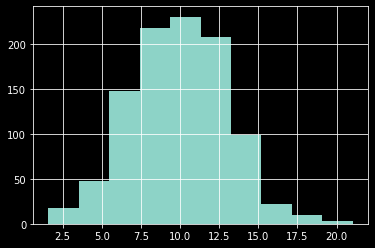

In [ ]:
pd.Series(np.random.normal(10,3,size=1000)).hist()

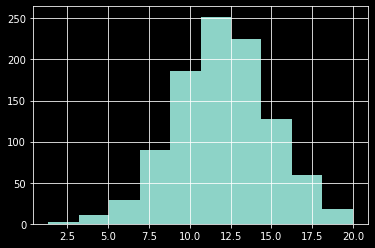

In [ ]:
pd.Series(np.random.normal(12,3,size=1000)).hist()

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
baseline = 10
mde = 2
result = []
n = 10000
sample_size = 36
for _ in tqdm(range(n)):
  a = np.random.normal(baseline,3,size=sample_size)
  b = np.random.normal(baseline + mde,3,size=sample_size)
  _, pval = ttest_ind(a,b,equal_var=False)
  result.append(pval)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
t = pd.Series(result)

In [ ]:
(t < 0.05).mean()

0.7964

Проверим как распределено выборочное среднее

In [ ]:
t = pd.Series([np.random.normal(10,3,size=36).mean() for _ in range(1000)])

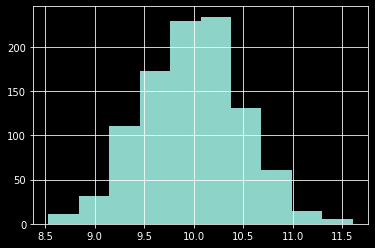

In [ ]:
t.hist()

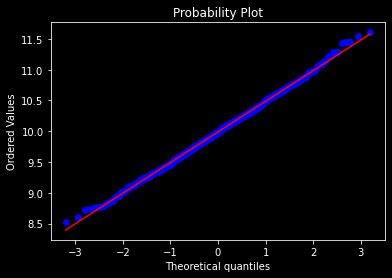

In [ ]:
import pylab 
import scipy.stats as stats
   
stats.probplot(t, dist="norm", plot=pylab)
pylab.show()

In [ ]:
t = pd.Series(np.random.pareto(2,size=100))

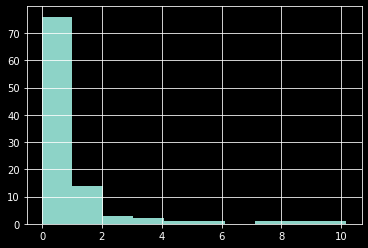

In [ ]:
t.hist()

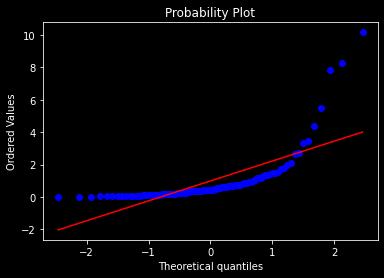

In [ ]:
stats.probplot(t, dist="norm", plot=pylab)
pylab.show()

In [ ]:
baseline = 10
mde = 2
result = []
n = 10000
sample_size = 36
for _ in tqdm(range(n)):
  a = np.random.normal(baseline,3,size=sample_size)
  b = np.random.normal(baseline,3,size=sample_size)
  _, pval = ttest_ind(a,b,equal_var=False)
  result.append(pval)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
t = pd.Series(result)

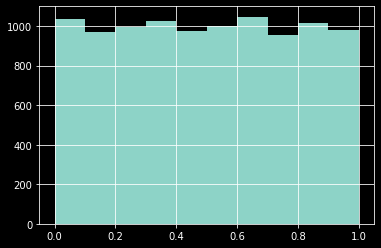

In [ ]:
t.hist()

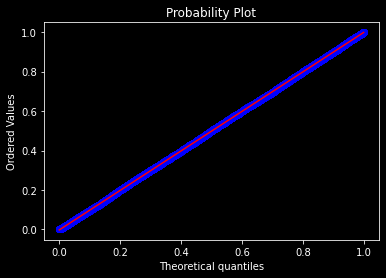

In [ ]:
stats.probplot(t, dist="uniform", plot=pylab)
pylab.show()

In [ ]:
(t < 0.05).mean()

0.0528

Как проверить, что можно применять t test:  
- выборочное среднее распределено нормально (bootstrap + qq) 
- p-value для выборок из одного распределения имеет равномерное распределение (bootstrap + qq)
- теоретический false positive == практическому false positive

In [ ]:
import statsmodels.stats.api as sms

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
sample = pd.Series(np.random.normal(10,3,size=1000))

In [ ]:
sample.std()

2.9590190948628092

In [ ]:
es = (12 - 10)/ 2.9590190948628092

In [ ]:
sms.TTestIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1)

35.34802272010062

Ненормальное распределение

In [ ]:
a = np.random.lognormal(mean=5, sigma=2, size=(100000,))
b = np.random.lognormal(mean=5.04, sigma=2, size=(100000,))

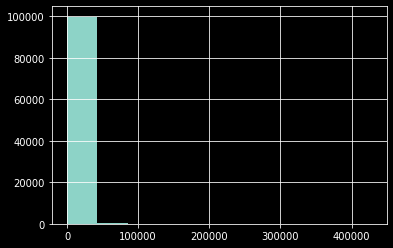

In [ ]:
pd.Series(a).hist()

In [ ]:
t = pd.Series([np.random.lognormal(mean=5, sigma=2, size=(100000,)).mean() for _ in tqdm(range(1000))])

  0%|          | 0/1000 [00:00<?, ?it/s]

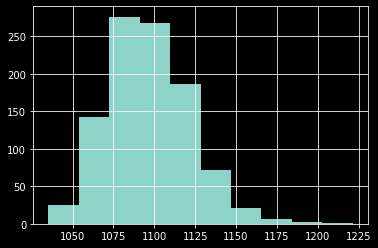

In [ ]:
t.hist()

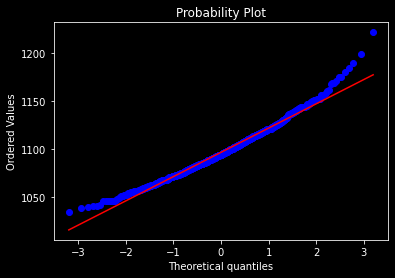

In [ ]:
stats.probplot(t, dist="norm", plot=pylab)
pylab.show()

In [ ]:
t.mean()

1096.8116661786364

In [ ]:
result = []
n = 1000
for _ in tqdm(range(n)):
  a = np.random.lognormal(mean=5, sigma=2, size=(100000,))
  b = np.random.lognormal(mean=5, sigma=2, size=(100000,))
  _, pval = ttest_ind(a,b,equal_var=False)
  result.append(pval)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
t = pd.Series(result)

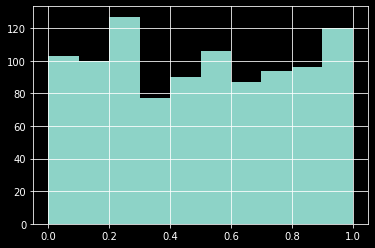

In [ ]:
t.hist()

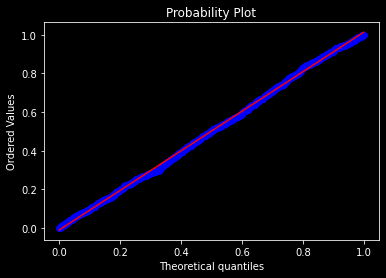

In [ ]:
stats.probplot(t, dist="uniform", plot=pylab)
pylab.show()

In [ ]:
(t < 0.05).mean()

0.046

In [ ]:
result = []
n = 1000
for _ in tqdm(range(n)):
  a = np.random.lognormal(mean=5, sigma=2, size=(100000,))
  b = np.random.lognormal(mean=5.04, sigma=2, size=(100000,))
  _, pval = ttest_ind(a,b,equal_var=False)
  result.append(pval)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
t = pd.Series(result)

In [ ]:
(t < 0.05).mean()

0.261

In [ ]:
a_mean_bs = pd.Series([np.random.lognormal(mean=5, sigma=2, size=(100000,)).mean() for _ in tqdm(range(1000))]).mean()

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
b_mean_bs = pd.Series([np.random.lognormal(mean=5.04, sigma=2, size=(100000,)).mean() for _ in tqdm(range(1000))]).mean()

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
a_mean_bs

1096.3537585718086

In [ ]:
b_mean_bs

1139.247610505568

In [ ]:
a_mean_math = np.exp(5 + (2**2)/2)

In [ ]:
b_mean_math = np.exp(5.04 + (2**2)/2)

In [ ]:
a_mean_math

1096.6331584284585

In [ ]:
b_mean_math

1141.387606628968

In [ ]:
a.std()

6005.85412878266

In [ ]:
es = (b_mean_math - a_mean_math)/ a.std()

In [ ]:
es

0.0074518040633099365

In [ ]:
sms.TTestIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1)

282693.11676529306

In [ ]:
t = pd.Series([np.random.lognormal(mean=5, sigma=2, size=(282693,)).mean() for _ in tqdm(range(1000))])

  0%|          | 0/1000 [00:00<?, ?it/s]

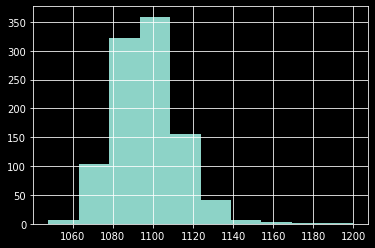

In [ ]:
t.hist()

In [ ]:
result = []
n = 1000
for _ in tqdm(range(n)):
  a = np.random.lognormal(mean=5, sigma=2, size=(282693,))
  b = np.random.lognormal(mean=5.04, sigma=2, size=(282693,))
  _, pval = ttest_ind(a,b,equal_var=False)
  result.append(pval)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
t = pd.Series(result)

In [ ]:
(t < 0.05).mean()

0.581

In [ ]:
result = []
n = 1000
for _ in tqdm(range(n)):
  a = np.log(np.random.lognormal(mean=5, sigma=2, size=(100000,)))
  b = np.log(np.random.lognormal(mean=5.04, sigma=2, size=(100000,)))
  _, pval = ttest_ind(a,b,equal_var=False)
  result.append(pval)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
t = pd.Series(result)

In [ ]:
(t < 0.05).mean()

0.995

In [ ]:
a = np.random.lognormal(mean=5, sigma=2, size=(100000,))

In [ ]:
a.mean()

1107.394926888026

In [ ]:
np.log(a).std()

2.0000280253819933

In [ ]:
es = (np.log(b_mean_math) - np.log(a_mean_math))/ np.log(a).std()

In [ ]:
es

0.01999971975010714

In [ ]:
sms.TTestIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1)

39246.36335512711

In [ ]:
result = []
n = 1000
for _ in tqdm(range(n)):
  a = np.log(np.random.lognormal(mean=5, sigma=2, size=(39246,)))
  b = np.log(np.random.lognormal(mean=5.04, sigma=2, size=(39246,)))
  _, pval = ttest_ind(a,b,equal_var=False)
  result.append(pval)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
t = pd.Series(result)

In [ ]:
(t < 0.05).mean()

0.8

In [ ]:
! gdown --id 1zLKWeJ_OZjxuKlP561-GopniC0_Pt_X6

Downloading...
From: https://drive.google.com/uc?id=1zLKWeJ_OZjxuKlP561-GopniC0_Pt_X6
To: /content/age_children_income_1000.csv
100% 38.8k/38.8k [00:00<00:00, 14.4MB/s]


In [ ]:
df = pd.read_csv('/content/age_children_income_1000.csv')

In [ ]:
df

,age,number_of_children,income
0,42.772420,0,34396.537188
1,29.561090,0,183350.052521
2,54.380735,0,53689.856555
3,42.551689,0,109080.913926
4,38.713080,0,153612.343419
...,...,...,...
995,36.281055,0,128647.922872
996,18.472716,0,67204.531673
997,40.547748,0,139432.757984
998,24.791760,1,137526.452334


In [ ]:
df['income'].mean()

129415.7463784342

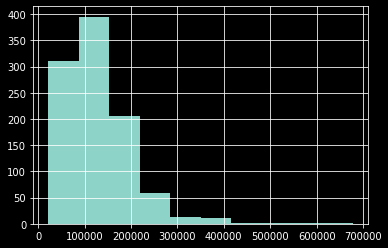

In [ ]:
df['income'].hist()

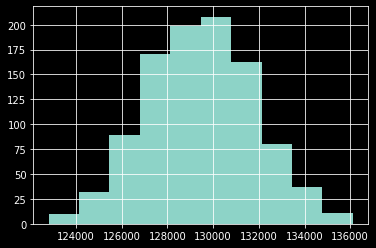

In [ ]:
pd.Series([df['income'].sample(1000,replace=True).mean() for _ in range(1000)]).hist()

In [ ]:
es = (150000 - 130000) / df['income'].std()

In [ ]:
es

0.2806953684356606

In [ ]:
sms.TTestIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1)

200.20012721743495

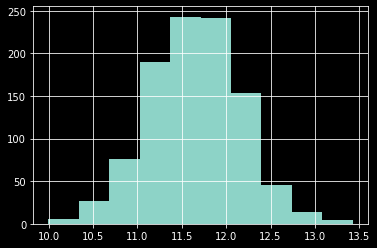

In [ ]:
np.log(df['income']).hist()

  1 / 100: ksone
  2 / 100: kstwobign
  3 / 100: norm
  4 / 100: alpha
  5 / 100: anglit
  6 / 100: arcsine
  7 / 100: beta
  8 / 100: betaprime
  9 / 100: bradford
 10 / 100: burr
 11 / 100: burr12
 12 / 100: fisk
 13 / 100: cauchy
 14 / 100: chi
 15 / 100: chi2
 16 / 100: cosine
 17 / 100: dgamma
 18 / 100: dweibull
 19 / 100: expon
 20 / 100: exponnorm
 21 / 100: exponweib
 22 / 100: exponpow
 23 / 100: fatiguelife
 24 / 100: foldcauchy
 25 / 100: f
 26 / 100: foldnorm
 27 / 100: weibull_min
 28 / 100: weibull_max
 29 / 100: frechet_r
 30 / 100: frechet_l
 31 / 100: genlogistic
 32 / 100: genpareto
 33 / 100: genexpon
 34 / 100: genextreme
 35 / 100: gamma
 36 / 100: erlang
 37 / 100: gengamma
 38 / 100: genhalflogistic
 39 / 100: gompertz
 40 / 100: gumbel_r
 41 / 100: gumbel_l
 42 / 100: halfcauchy
 43 / 100: halflogistic
 44 / 100: halfnorm
 45 / 100: hypsecant
 46 / 100: gausshyper
 47 / 100: invgamma
 48 / 100: invgauss
 49 / 100: geninvgauss
 50 / 100: norminvgauss
 51 / 100: 

Text(0, 0.5, 'Frequency')

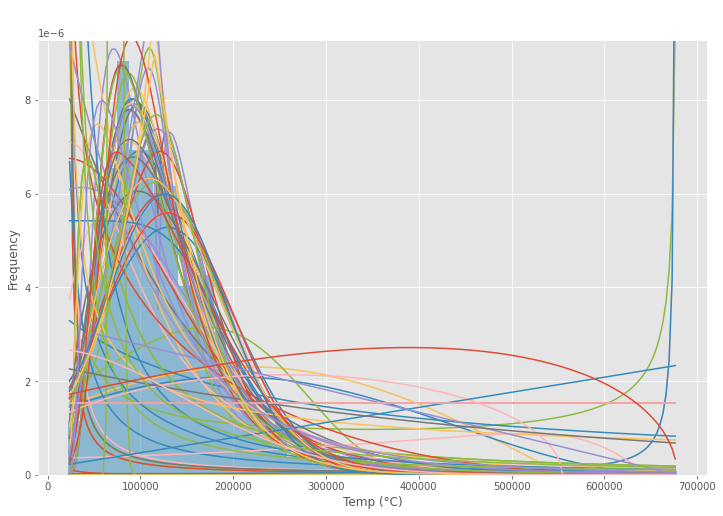

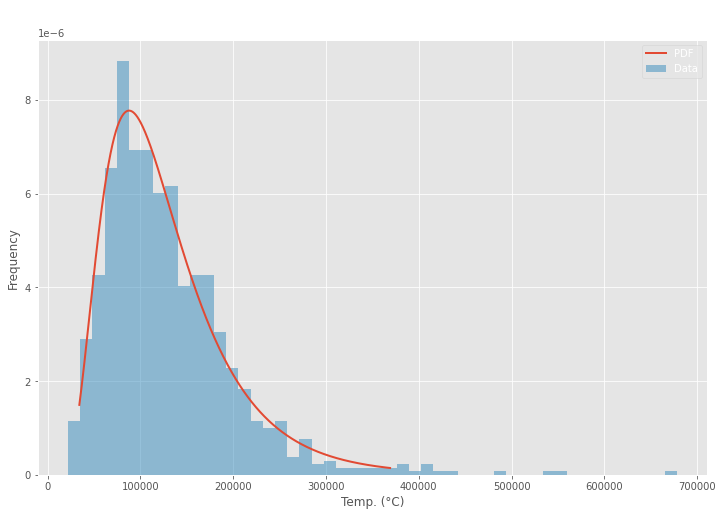

In [ ]:
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Best holders
    best_distributions = []

    # Estimate distribution parameters from data
    for ii, distribution in enumerate([d for d in _distn_names if not d in ['levy_stable', 'studentized_range']]):

        print("{:>3} / {:<3}: {}".format( ii+1, len(_distn_names), distribution ))

        distribution = getattr(st, distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')
                
                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]
                
                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                
                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                best_distributions.append((distribution, params, sse))
        
        except Exception:
            pass

    
    return sorted(best_distributions, key=lambda x:x[2])

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = df['income']

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_distibutions = best_fit_distribution(data, 200, ax)
best_dist = best_distibutions[0]

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
ax.set_xlabel(u'Temp (°C)')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist[0], best_dist[1])

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
dist_str = '{}({})'.format(best_dist[0].name, param_str)

ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Temp. (°C)')
ax.set_ylabel('Frequency')

In [ ]:
t = pd.DataFrame(best_distibutions).sort_values(2)

In [ ]:
t[0][0]

In [ ]:
t[1][0]

(8.635547387774977, 1.940117105713055, -622.73639508824, 9922160.800678246)

In [ ]:
from scipy.stats import johnsonsb

In [ ]:
t

,0,1,2
0,<scipy.stats._continuous_distns.johnsonsb_gen ...,"(8.635547387774977, 1.940117105713055, -622.73...",1.079567e-10
1,<scipy.stats._continuous_distns.johnsonsu_gen ...,"(-6.485501433946867, 1.9829269046225697, -951....",1.080420e-10
2,<scipy.stats._continuous_distns.moyal_gen obje...,"(89998.53146932834, 30662.92788769659)",1.087651e-10
3,<scipy.stats._continuous_distns.invgamma_gen o...,"(7.379977853284383, -37236.18767801169, 106378...",1.094373e-10
4,<scipy.stats._continuous_distns.pearson3_gen o...,"(1.22551483493373, 129415.74269007925, 67102.0...",1.110460e-10
...,...,...,...
96,<scipy.stats._continuous_distns.recipinvgauss_...,"(0.019883057522424048, 45284.736829198635, 539...",1.963693e-08
97,<scipy.stats._continuous_distns.vonmises_gen o...,"(1.825317629918175, 75184.44851026806, 4.24046...",5.570466e+47
91,<scipy.stats._continuous_distns.mielke_gen obj...,"(1009.0448603825397, 1.951758190999254, -15.04...",NaN
95,<scipy.stats._continuous_distns.powernorm_gen ...,"(2.452304682176807e-05, 14102.20333771401, 474...",NaN


In [ ]:
a, b = -622.73639508824, 9922160.800678246
mean, var, skew, kurt = johnsonsb.stats(a, b, moments='mvsk')

In [ ]:
mean

array(0.50001569)

In [ ]:
(df['income'] + 20000).mean()

149415.746378434

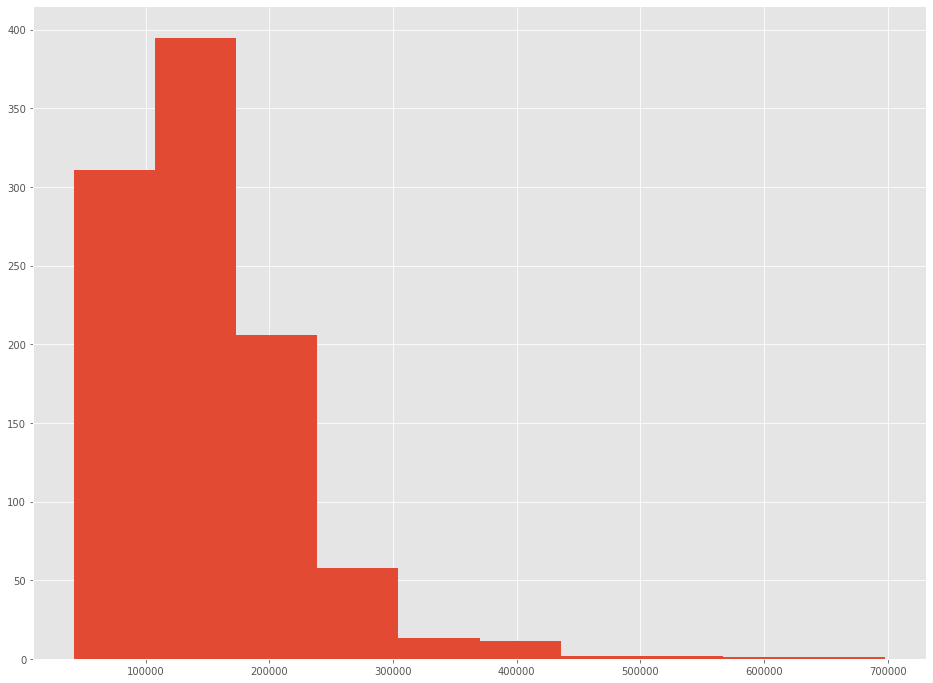

In [ ]:
(df['income'] + 20000).hist()

In [ ]:
df['income']

0       34396.537188
1      183350.052521
2       53689.856555
3      109080.913926
4      153612.343419
           ...      
995    128647.922872
996     67204.531673
997    139432.757984
998    137526.452334
999    148449.261137
Name: income, Length: 1000, dtype: float64

In [ ]:
from scipy.stats import mannwhitneyu

In [ ]:
result = []
n = 100
for _ in tqdm(range(n)):
  a = np.log(np.random.lognormal(mean=5, sigma=2, size=(42000,)))
  b = np.log(np.random.lognormal(mean=5.04, sigma=2, size=(42000,)))
  _, pval = mannwhitneyu(a,b,alternative='two-sided')
  result.append(pval)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
t = pd.Series(result)

In [ ]:
(t < 0.05).mean()

0.84

In [ ]:
result = []
n = 100
for _ in tqdm(range(n)):
  a = np.log(np.random.lognormal(mean=5, sigma=2, size=(30000,)))
  b = np.log(np.random.lognormal(mean=5, sigma=2, size=(30000,)))
  _, pval = mannwhitneyu(a,b)
  result.append(pval)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
t = pd.Series(result)

In [ ]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

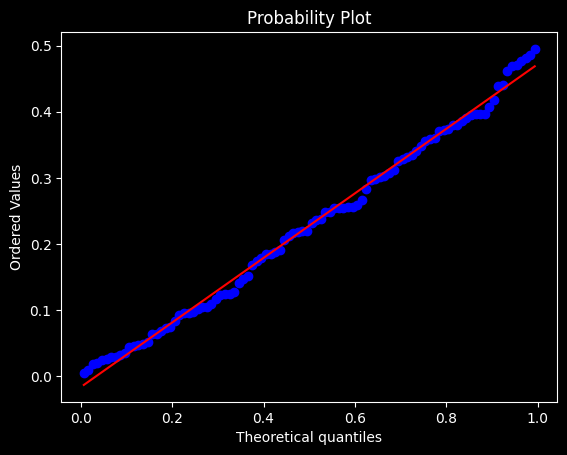

In [ ]:
stats.probplot(t, dist="uniform", plot=pylab)
pylab.show()

In [ ]:
(t < 0.05).mean()

0.14

In [ ]:
result = []
n = 1000
for _ in tqdm(range(n)):
  a = np.log(np.random.lognormal(mean=5, sigma=2, size=(100000,)))
  b = np.log(np.random.lognormal(mean=5, sigma=2, size=(100000,)))
  _, pval = mannwhitneyu(a,b,alternative='two-sided')
  result.append(pval)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
t = pd.Series(result)

In [ ]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

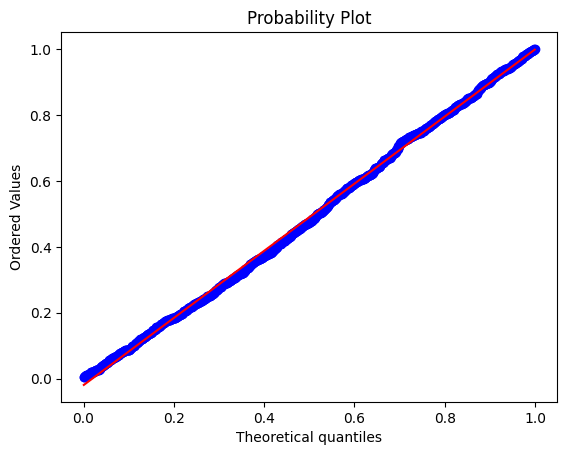

In [ ]:
stats.probplot(t, dist="uniform", plot=pylab)
pylab.show()

In [ ]:
(t < 0.05).mean()

0.054

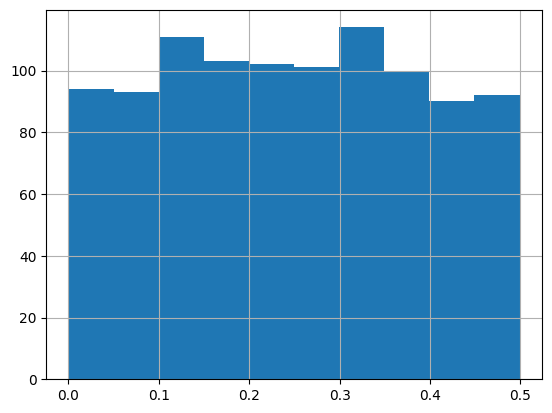

In [ ]:
t.hist()

In [ ]:
mannwhitneyu()